# HW2

- tasks
    - 划分训练集和验证集；
    - 按照 MMPreTrain CustomDataset 格式组织训练集和验证集；
    - 使用 MMPreTrain 算法库，编写配置文件，正确加载预训练模型；
    - 在水果数据集上进行微调训练；
    - 使用 MMPreTrain 的 ImageClassificationInferencer 接口，对网络水果图像，或自己拍摄的水果图像，使用训练好的模型进行分类。
- 需提交的验证集评估指标（不能低于 60%）

![example acc image](https://user-images.githubusercontent.com/66227028/243670989-d72eb206-9df3-44f6-8ad5-28ae70858fa2.png)

## 3. setup config file, load pretrained model


In [ ]:
# done, see resnet50_8xb32_fruit30.py

## 4. fineturning on fruit dataset


### train

In [3]:
import os
import matplotlib.pyplot as plt
import json
import numpy

PROJECT_ROOT = '/home/louzekun/projects/mmlab/mmpretrain'
os.chdir(PROJECT_ROOT)


In [16]:
# !python tools/train.py resnet50_8xb32_fruit30.py --work-dir=/home/louzekun/projects/mmlab/mmpretrain/log
!cat /home/louzekun/projects/mmlab/mmpretrain/log/20230609_150855/20230609_150855.log | tail -8

2023/06/09 15:30:39 - mmengine - INFO - Exp name: resnet50_8xb32_fruit30_20230609_150855
2023/06/09 15:30:39 - mmengine - INFO - Saving checkpoint at 100 epochs
2023/06/09 15:30:44 - mmengine - INFO - Epoch(val) [100][ 5/28]    eta: 0:00:03  time: 0.0967  data_time: 0.0720  memory: 2943  
2023/06/09 15:30:44 - mmengine - INFO - Epoch(val) [100][10/28]    eta: 0:00:02  time: 0.1457  data_time: 0.1199  memory: 615  
2023/06/09 15:30:45 - mmengine - INFO - Epoch(val) [100][15/28]    eta: 0:00:01  time: 0.0803  data_time: 0.0557  memory: 615  
2023/06/09 15:30:45 - mmengine - INFO - Epoch(val) [100][20/28]    eta: 0:00:00  time: 0.0617  data_time: 0.0376  memory: 615  
2023/06/09 15:30:45 - mmengine - INFO - Epoch(val) [100][25/28]    eta: 0:00:00  time: 0.0598  data_time: 0.0356  memory: 615  
2023/06/09 15:30:45 - mmengine - INFO - Epoch(val) [100][28/28]    accuracy/top1: 92.5676  accuracy/top5: 99.4369  data_time: 0.0557  time: 0.0800


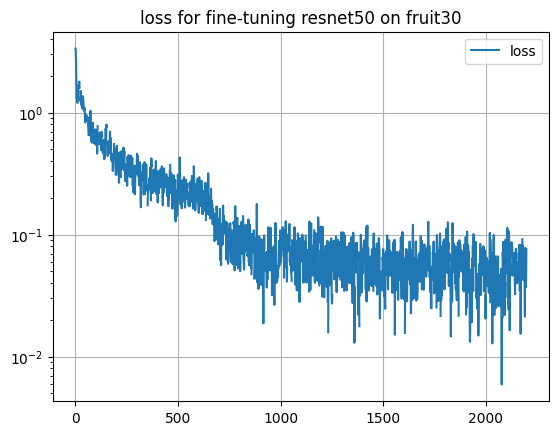

In [17]:
"""
in the log file, we can see the following:
{"lr": 0.01, "data_time": 0.6630618095397949, "loss": 3.3543569087982177, "time": 1.1967766284942627, "epoch": 1, "memory": 2943, "step": 5}
plot loss against step
"""
log_scalars = "/home/louzekun/projects/mmlab/mmpretrain/20230609_150855/vis_data/scalars.json"
with open(log_scalars, 'r') as f:
    lines = f.readlines()
    scalars = [json.loads(line) for line in lines]

loss = [entry.get('loss') for entry in scalars]
plt.plot(loss, label='loss')
plt.title('loss for fine-tuning resnet50 on fruit30')
plt.grid()
plt.legend()
plt.yscale('log')
plt.show()

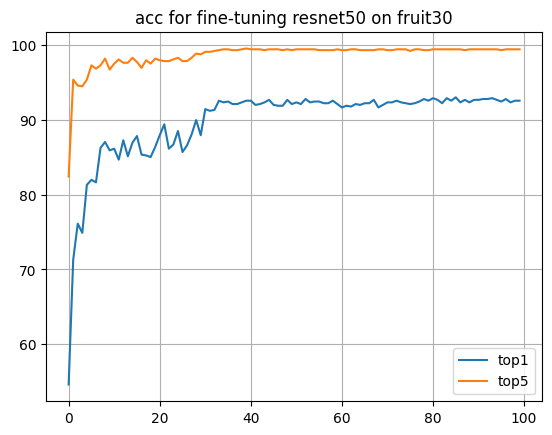

In [18]:
"""
in the log file, we can see the following:
{"accuracy/top1": 54.61711883544922, "accuracy/top5": 82.43243408203125, "data_time": 0.0756727967943464, "time": 0.0996132493019104, "step": 1}
plot accuracy against step
"""
log_scalars = "/home/louzekun/projects/mmlab/mmpretrain/20230609_150855/vis_data/scalars.json"
with open(log_scalars, 'r') as f:
    lines = f.readlines()
    scalars = [json.loads(line) for line in lines]

acc_top1 = [entry.get('accuracy/top1') for entry in scalars]
acc_top1 = [entry for entry in acc_top1 if entry is not None]
acc_top5 = [entry.get('accuracy/top5') for entry in scalars]
acc_top5 = [entry for entry in acc_top5 if entry is not None]
plt.plot(acc_top1, label='top1')
plt.plot(acc_top5, label='top5')
plt.title('acc for fine-tuning resnet50 on fruit30')
plt.grid()
plt.legend()
plt.savefig('fruit_acc.png')
plt.show()

### test

In [1]:
#! python tools/test.py resnet50_8xb32_fruit30.py log/best_accuracy_top1_epoch_86.pth --work-dir=/home/louzekun/projects/mmlab/mmpretrain/log
!cat /home/louzekun/projects/mmlab/mmpretrain/log/20230609_154313/20230609_154313.log | tail -8


 -------------------- 
2023/06/09 15:43:18 - mmengine - INFO - Load checkpoint from log/best_accuracy_top1_epoch_86.pth
2023/06/09 15:43:23 - mmengine - INFO - Epoch(test) [ 5/28]    eta: 0:00:25  time: 1.1140  data_time: 0.6887  memory: 427  
2023/06/09 15:43:24 - mmengine - INFO - Epoch(test) [10/28]    eta: 0:00:10  time: 0.5693  data_time: 0.3445  memory: 427  
2023/06/09 15:43:24 - mmengine - INFO - Epoch(test) [15/28]    eta: 0:00:05  time: 0.0243  data_time: 0.0003  memory: 427  
2023/06/09 15:43:24 - mmengine - INFO - Epoch(test) [20/28]    eta: 0:00:02  time: 0.0460  data_time: 0.0222  memory: 427  
2023/06/09 15:43:24 - mmengine - INFO - Epoch(test) [25/28]    eta: 0:00:00  time: 0.0525  data_time: 0.0288  memory: 427  
2023/06/09 15:43:24 - mmengine - INFO - Epoch(test) [28/28]    accuracy/top1: 93.0180  accuracy/top5: 99.4369  data_time: 0.1353  time: 0.2307
